In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from feature_engine.datetime import DatetimeFeatures

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,make_scorer
from sklearn.model_selection import learning_curve

import joblib

## 2_Getting Data

In [75]:
train_df = pd.read_csv('./data/train.csv')
val_df = pd.read_csv('./data/val.csv')
test_df = pd.read_csv('./data/test.csv')

In [76]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
 9   price            640 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 50.1+ KB


In [77]:
train_df.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-03-27,Mumbai,Hyderabad,19:05:00,20:30:00,85,0.0,No Info,2754
1,Jet Airways,2019-05-06,Kolkata,Banglore,14:05:00,19:50:00,345,1.0,No Info,14781
2,Indigo,2019-03-21,Kolkata,Banglore,21:25:00,00:05:00,160,0.0,No Info,4148
3,Multiple Carriers,2019-03-27,Delhi,Cochin,09:45:00,22:20:00,755,1.0,No Info,6601
4,Air Asia,2019-06-09,Kolkata,Banglore,15:10:00,23:30:00,500,2.0,No Info,7870


### 3_ Split the data

In [78]:
def split_data(data):
    X = data.drop(columns='price')  # Drop the 'Price' column
    y = data['price'].copy()         # Access the 'Price' column correctly
    return (X, y)

In [79]:
train_df.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [80]:
# train test split data

X_train, y_train = split_data(train_df)


In [81]:
X_train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
0,Indigo,2019-03-27,Mumbai,Hyderabad,19:05:00,20:30:00,85,0.0,No Info
1,Jet Airways,2019-05-06,Kolkata,Banglore,14:05:00,19:50:00,345,1.0,No Info
2,Indigo,2019-03-21,Kolkata,Banglore,21:25:00,00:05:00,160,0.0,No Info
3,Multiple Carriers,2019-03-27,Delhi,Cochin,09:45:00,22:20:00,755,1.0,No Info
4,Air Asia,2019-06-09,Kolkata,Banglore,15:10:00,23:30:00,500,2.0,No Info
...,...,...,...,...,...,...,...,...,...
635,Jet Airways,2019-05-01,Kolkata,Banglore,17:00:00,23:35:00,395,1.0,In-flight meal not included
636,Jet Airways,2019-03-27,Delhi,Cochin,17:35:00,04:25:00,650,2.0,In-flight meal not included
637,Jet Airways,2019-03-03,Delhi,Cochin,21:50:00,18:50:00,1260,1.0,No Info
638,Multiple Carriers,2019-06-03,Delhi,Cochin,11:25:00,19:15:00,470,1.0,No Info


In [82]:
y_train

0       2754
1      14781
2       4148
3       6601
4       7870
       ...  
635    12384
636     9412
637    17024
638     7354
639     7191
Name: price, Length: 640, dtype: int64

In [83]:
X_val, y_val = split_data(val_df)

In [84]:
print(f"x_validation {X_val.shape } and y_validation {y_val.shape}")

x_validation (160, 9) and y_validation (160,)


In [85]:
X_test, y_test = split_data(test_df)

In [86]:
print(f"x_validation {X_test.shape } and y_validation {y_test.shape}")

x_validation (200, 9) and y_validation (200,)


## 4_Meta info

In [87]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
 9   price            640 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 50.1+ KB


In [88]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          160 non-null    object 
 1   date_of_journey  160 non-null    object 
 2   source           160 non-null    object 
 3   destination      160 non-null    object 
 4   dep_time         160 non-null    object 
 5   arrival_time     160 non-null    object 
 6   duration         160 non-null    int64  
 7   total_stops      160 non-null    float64
 8   additional_info  160 non-null    object 
 9   price            160 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 12.6+ KB


In [89]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          200 non-null    object 
 1   date_of_journey  200 non-null    object 
 2   source           200 non-null    object 
 3   destination      200 non-null    object 
 4   dep_time         200 non-null    object 
 5   arrival_time     200 non-null    object 
 6   duration         200 non-null    int64  
 7   total_stops      200 non-null    float64
 8   additional_info  200 non-null    object 
 9   price            200 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


## 5_preprocess the data

In [90]:
train_df.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

In [101]:
dt_col = ['date_of_journey','dep_time','arrival_time']

num_col = ['duration','total_stops']

cat_col = [col for col in  X_train.columns if (col not in dt_col) and (col not in num_col)]

In [102]:
cat_col

['airline', 'source', 'destination', 'additional_info']

In [137]:
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])
cat_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(sparse_output=False,handle_unknown='ignore'))
])
doj_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('extractor', DatetimeFeatures(features_to_extract=['month','week','day_of_week','day_of_month'], format='mixed')),
    ('scaler',StandardScaler())
])

time_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('extractor', DatetimeFeatures(features_to_extract=['hour','minute'], format='mixed')),
    ('scaler',StandardScaler())
])

#### `column transformer` help us to apply sequence of operation on particaular set of column(diff columns)
#### `feature engine` is used to extract features out of columns.

In [138]:
print(X_train.columns)

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info'],
      dtype='object')


In [139]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,num_col),
    ('cat',cat_transformer,cat_col),
    ('doj',doj_transformer,['date_of_journey']),
    ('time',time_transformer,['dep_time','arrival_time'])
])

In [140]:
preprocessor.fit_transform(X_train)

array([[-1.09283863, -1.26923077,  0.        , ..., -0.98477454,
         0.92355717,  0.2621908 ],
       [-0.56776616,  0.26923077,  0.        , ..., -0.98477454,
         0.7782581 ,  1.48035495],
       [-0.94137542, -1.26923077,  0.        , ...,  0.09304625,
        -1.98242409, -1.26051439],
       ...,
       [ 1.28008503,  0.26923077,  0.        , ...,  1.44032224,
         0.63295904,  1.48035495],
       [-0.31532748,  0.26923077,  0.        , ...,  0.09304625,
         0.7782581 , -0.65143231],
       [-0.11337653,  0.26923077,  0.        , ..., -1.25422974,
        -1.83712502,  0.2621908 ]])

### 6_Model Selection

In [141]:
algorithms = {
    'linear_regression':LinearRegression(),
    'svm':SVR(),
    'random_forest':RandomForestRegressor(n_estimators=10),
    'xgboost':XGBRegressor(n_estimator=10)
}

In [142]:
data = pd.concat([train_df,val_df],axis=0)
X_data,y_data=split_data(data)
# print the shape of each
print(f"x_data {X_data.shape } and y_data {y_data.shape}")

x_data (800, 9) and y_data (800,)


In [143]:
def plot_curves(sizes, mean_scores, std_scores, label, ax):
    ax.plot(
        sizes,
        mean_scores,
        marker="o",
        label=label  # Fixed missing comma
    )
    
    ax.fill_between(
        sizes,
        y1=mean_scores - std_scores,
        y2=mean_scores + std_scores,
        alpha=0.2
    )

In [144]:
def plot_learning_curve(name, algorithm, figsize=(12, 4)):
    model = Pipeline(steps=[
        ('pre', preprocessor),
        ('alg', algorithm)
    ])
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_data,
        y=y_data,
        cv=3,
        scoring='r2',  # Using string for scoring
        n_jobs=-1,
        random_state=42   
    )
    
    mean_train_scores = np.mean(train_scores, axis=1)
    std_train_scores = np.std(train_scores, axis=1)
    train_score = f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"
    
    mean_test_scores = np.mean(test_scores, axis=1)
    std_test_scores = np.std(test_scores, axis=1)
    test_score = f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot training curve
    plot_curves(train_sizes, mean_train_scores, std_train_scores, f"Train ({train_score})", ax)
    
    # Plot test curve
    plot_curves(train_sizes, mean_test_scores, std_test_scores, f"Test ({test_score})", ax)
    
    ax.legend(loc="lower right")
    ax.set_xlabel("Training examples")
    ax.set_ylabel("R-Score")
    ax.set_title(name)
    plt.grid()  # Optional: Add grid for better readability
    plt.show()

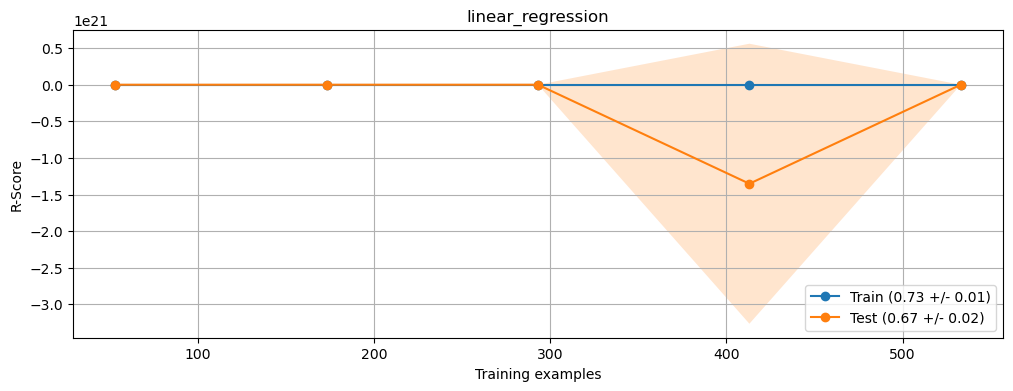

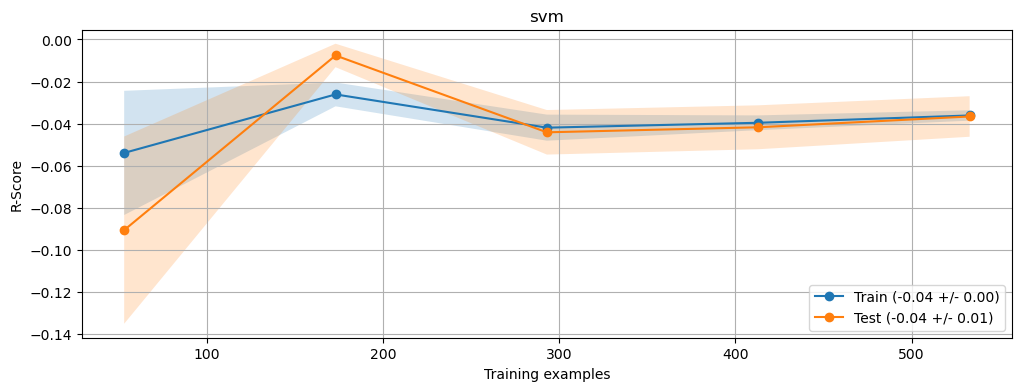

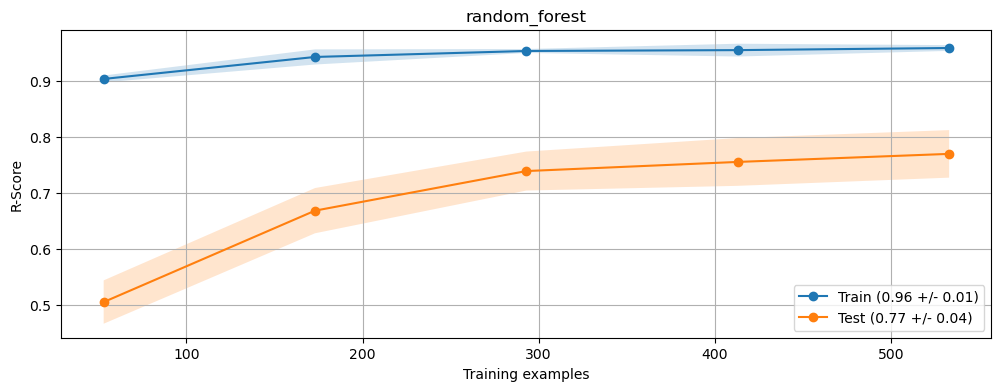

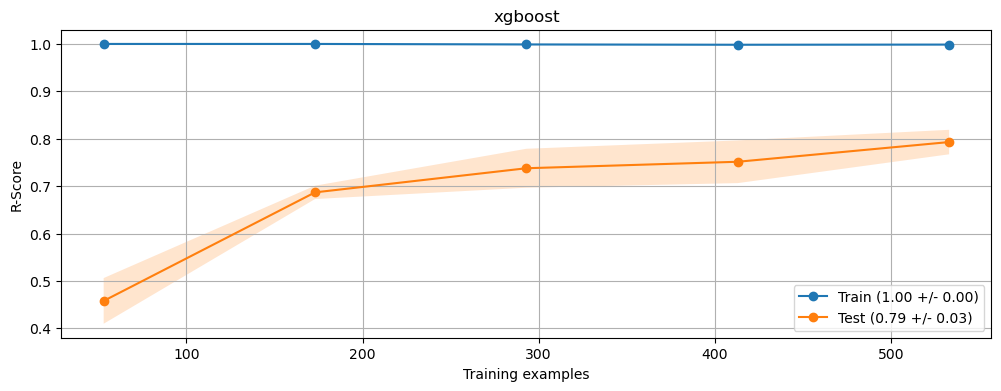

In [145]:
# Assuming algorithms is a dictionary of model names and instances
for name, alg in algorithms.items():
    plot_learning_curve(name, alg)

## 7_Model Training

In [161]:
model = Pipeline(steps=[
    ('pre',preprocessor),
    ('alg',XGBRegressor(n_estimator=10))
])

In [162]:
model.fit(X_data,y_data)

c:\Users\user\miniconda3\envs\flask_ml\lib\site-packages\xgboost\core.py:158: UserWarning: [09:59:05] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_stops']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source',
                                                   'destination',
                                                   'add...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimator=10, n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

## 8_Model Evaluation

In [163]:
def evaluate_model(X,y):
    y_pred = model.predict(X)
    return r2_score(y,y_pred)

In [164]:
print(f"R2 score on Training data is = {evaluate_model(X_data,y_data)}")

R2 score on Training data is = 0.9971287846565247


In [165]:
# print same for testing data
print(f"R2 score on Training data is = {evaluate_model(X_test,y_test)}")

R2 score on Training data is = 0.5193898677825928


## 9_Model Presistence

In [167]:

joblib.dump(model, "model.joblib")

['model.joblib']

In [169]:
# loading the model

saved_model = joblib.load("model.joblib")
saved_model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_stops']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source',
                                                   'destination',
                                                   'add...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimator=10, n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [171]:
# check the model on x_test
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.5193898677825928